<a href="https://colab.research.google.com/github/eleezs/Arduino/blob/master/Copy_of_Igbo_Handwriting_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
cd /content/drive/My Drive/Final/data2

/content/drive/My Drive/Final/data2


In [12]:
import pandas as pd
import numpy as np
import os

## DATA PREPARATION

In [14]:
labels = []
for label in os.listdir("."):
  labels.append(label)

len(labels)

36

In [15]:
labels

['r',
 'y',
 'sh',
 's',
 'w',
 't',
 'v',
 'u',
 'z',
 'nw',
 'n',
 'kw',
 'ny',
 'p',
 'm',
 'l',
 'o',
 'g',
 'j',
 'h',
 'k',
 'gh',
 'gb',
 'i',
 'kp',
 'gw',
 'a',
 'ch',
 'b',
 'f',
 'e',
 'd',
 'Ṅ',
 'ị',
 'ọ',
 'ụ']

In [16]:
DATA = []
for label in labels:
  img = os.listdir(label)
  for im in img:
    DATA.append(im)
    df = pd.DataFrame(DATA, columns=["image"])

In [ ]:
df

,image
0,r.jpg
1,r.1.jpg
2,r.2.jpg
3,r.3.jpg
4,r.4.jpg
...,...
256,u2.1.jpg
257,u2.2.jpg
258,u2.3.jpg
259,u2.4.jpg


In [ ]:
labelName = []
for name in df["image"]:
  name = name.split(".")[0]
  labelName.append(name)
df["label"] = labelName

In [ ]:
df.head()

,image,label
0,r.jpg,r
1,r.1.jpg,r
2,r.2.jpg,r
3,r.3.jpg,r
4,r.4.jpg,r


In [ ]:
df["label"].value_counts()

z       10
u        9
m        8
n        8
v        8
nw       8
w        8
kp       8
j        8
gh       8
t        8
h        7
o        7
gb       7
gw       7
b        7
e        7
r        7
i        7
a        7
d        7
p        7
ny       7
y        7
s        7
kw       7
k        7
l        7
sh       7
g        7
f        6
i2       6
ch       6
u2       6
o2       5
n2       5
n1       2
n2,4     1
Name: label, dtype: int64

In [ ]:
df.loc[df["label"]=="n1"]

,image,label
242,n1.6.jpg,n1
243,n1.7.jpg,n1


In [ ]:
df["label"].replace({"i2":"ị", "u2":"ụ", "o2":"ọ", "n2":"Ṅ", \
                     "n2,4":"Ṅ", "n1":"Ṅ"}, inplace=True)

len(df["label"].value_counts())

36

In [ ]:
df.to_csv("handwriting.csv", index=False)

## MODEL DEVELOPMENT

In [1]:
import pandas as pd
import numpy as np
import os
import cv2
 
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D
from keras.applications import *
from tqdm import tqdm
 
from sklearn.model_selection import train_test_split

In [17]:
os.chdir("/content/drive/My Drive/Final")
os.getcwd()

'/content/drive/My Drive/Final'

In [18]:
df = pd.read_csv("handwriting.csv")
print(len(df), "\n")
df.head()

261 



,image,label
0,r.jpg,r
1,r.1.jpg,r
2,r.2.jpg,r
3,r.3.jpg,r
4,r.4.jpg,r


In [19]:
train, test = train_test_split(df, test_size=0.03, shuffle = True, random_state=24) #spliting the dataset

In [20]:
len(train)

253

In [21]:
len(train["label"].value_counts()) # train data contains all classes.

36

In [22]:
### TRAIN #one hot encoding is used to convert categorical labels into numerical and columns
from sklearn.preprocessing import OneHotEncoder
 
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
 
# passing bridge-types-cat column (label encoded values of bridge_types)
train_enc_df = pd.DataFrame(enc.fit_transform(train[['label']]).toarray())
train_enc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
### TEST
 
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
 
# passing bridge-types-cat column (label encoded values of bridge_types)
test_enc_df = pd.DataFrame(enc.fit_transform(test[['label']]).toarray())
test_enc_df[["8","9", "10", "11", "12", "13", "14","15","16",
             "17", "18", "19","20","21", "22","22",
             "23","24","25","26","27","28","29","30","31",
             "32","33","34","35"]]=0.0
test_enc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# convert train data to numpy
x = []
dim = (28,28)
for i, label in tqdm(train.values):
    img = cv2.imread('./data2/'+label+'/{}'.format(i))
    if len(img.shape) > 2 and img.shape[2] == 3:
        # convert the image from RGBA2RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
    img = cv2.resize(img, dim)
    
    img = img/255 #normalization so as to keep the pixels between 0 and 1
    x.append(img)
trainX = np.array(x)

100%|██████████| 253/253 [01:04<00:00,  3.92it/s]


In [34]:
# convert test data to numpy
x = []
dim = (28,28)
for i, label in tqdm(test.values):
    img = cv2.imread('./data2/'+label+'/{}'.format(i))
    if len(img.shape) > 2 and img.shape[2] == 3:
        # convert the image from RGBA2RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
    img = cv2.resize(img, dim)
    
    img = img/255
    x.append(img)
testX = np.array(x)

100%|██████████| 8/8 [00:00<00:00, 395.99it/s]


In [35]:
trainY = np.array(train_enc_df)
print(trainY.shape)
 
testY = np.array(test_enc_df)
print(testY.shape)

(253, 36)
(8, 36)


In [37]:
trainY = trainY.astype('float32')
trainX = trainX.astype('float32')
 
testY = testY.astype('float32')
testX = testX.astype('float32')

In [38]:
# get out a portion from the train data for validation
trainx = trainX[:240]
trainy = trainY[:240]
 
validx = trainX[240:]
validy = trainY[240:]
 
assert(len(trainx)+len(validx)==len(trainX))

In [39]:
in_shape = (28,28,3) 
batch_size = 16 #32 samples

In [40]:
Num_classes = 36

In [ ]:
## CNN Model 1
model = Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=in_shape))  
model.add(Conv2D(64, 4, strides=2, activation="relu"))
#model.add(BatchNormalization))
#model.add(Conv2D(28, 4, strides=2, activation="relu"))
model.add(Conv2D(32, 4, strides=2, activation="relu"))
model.add(Dropout(0.5)) #here 0.5 of the node is left out, it is used to control overfitting
#model.add(Conv2D(64, 4, strides=2, activation="relu"))
model.add(MaxPooling2D(2))
 
#model.add(Dense(100, activation='relu'))
model.add(GlobalMaxPooling2D())
#model.add(Dropout(0.2))
model.add(Dense(16, activation='softmax'))
model.summary()

In [ ]:
## CNN Model 2 conv-pool-conv
model = Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=in_shape))
model.add(Conv2D(64, (5, 5), strides = (2, 2), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(Num_classes, activation = 'softmax'))

In [41]:
## CNN model 3
model = Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=in_shape))
model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(Conv2D(16, kernel_size=(3, 3), padding='same', activation="relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(3, 3), strides=2, padding='same'))

model.add(Conv2D(32, kernel_size=(5, 5), activation="relu"))
model.add(Conv2D(32, kernel_size=(5, 5), activation="relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Dropout(0.25))
model.add(Flatten())
#model.add(BatchNormalization())
model.add(Dense(256, activation = 'relu'))
#model.add(Dropout(0.25))
model.add(Dense(Num_classes, activation = 'softmax'))

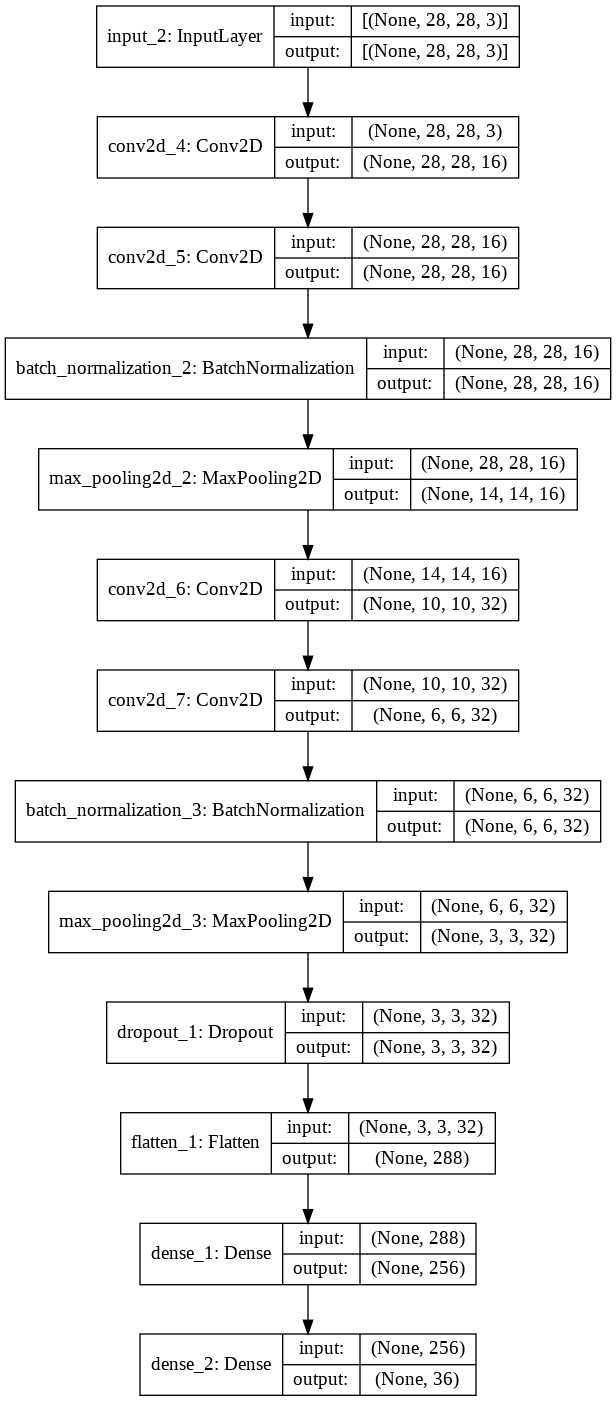

In [9]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file="handwritingModelArch.png")

In [46]:
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
opt  = Adam(learning_rate=0.0001)
     # google the best loss to use
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
callbacks = [EarlyStopping(monitor='val_loss', patience=7, verbose=2),
                ModelCheckpoint(filepath='/content/drive/My Drive/Final/training_weights/',
                                 save_best_only=True,
                                 save_weights_only=True)]
#patience = 7 is to control overfitting
#early stopping is used to stop the model when its not learning any thing again.

In [47]:
history = model.fit(x=trainx, y=trainy, validation_data=(validx, validy),
                  batch_size=batch_size,verbose=2, callbacks=callbacks, epochs=15,shuffle=True)

Epoch 1/15
15/15 - 1s - loss: 0.1076 - accuracy: 0.9917 - val_loss: 4.2798 - val_accuracy: 0.0000e+00
Epoch 2/15
15/15 - 1s - loss: 0.0827 - accuracy: 1.0000 - val_loss: 4.2399 - val_accuracy: 0.0000e+00
Epoch 3/15
15/15 - 1s - loss: 0.0591 - accuracy: 1.0000 - val_loss: 4.2267 - val_accuracy: 0.0000e+00
Epoch 4/15
15/15 - 1s - loss: 0.0541 - accuracy: 1.0000 - val_loss: 4.1239 - val_accuracy: 0.0000e+00
Epoch 5/15
15/15 - 1s - loss: 0.0542 - accuracy: 1.0000 - val_loss: 4.0105 - val_accuracy: 0.0000e+00
Epoch 6/15
15/15 - 1s - loss: 0.0440 - accuracy: 1.0000 - val_loss: 3.9645 - val_accuracy: 0.0000e+00
Epoch 7/15
15/15 - 1s - loss: 0.0430 - accuracy: 1.0000 - val_loss: 3.9171 - val_accuracy: 0.0000e+00
Epoch 8/15
15/15 - 1s - loss: 0.0368 - accuracy: 0.9958 - val_loss: 3.8583 - val_accuracy: 0.0000e+00
Epoch 9/15
15/15 - 1s - loss: 0.0369 - accuracy: 1.0000 - val_loss: 3.7983 - val_accuracy: 0.0000e+00
Epoch 10/15
15/15 - 1s - loss: 0.0341 - accuracy: 1.0000 - val_loss: 3.8191 - val_

In [58]:
from sklearn.metrics import accuracy_score, fbeta_score
p_valid = model.predict(testX, batch_size=16, verbose=1)

print(fbeta_score(testY, np.array(p_valid)>0.02, beta=2, average='samples'))

1/1 [==============================] - 0s 18ms/step
0.11659228928965772


In [52]:
from keras.applications.resnet50 import ResNet50

In [56]:
# Transfer learning with RESNET50
base_model = ResNet50(include_top=False,
                   weights='imagenet',
                   input_shape=(28,28,3))

res50_model = Sequential()
res50_model.add(BatchNormalization(input_shape=(28,28,3)))

res50_model.add(base_model)
res50_model.add(Flatten())
res50_model.add(Dropout(0.5))

res50_model.add(Dense(36, activation='softmax'))

ValueError: ignored

In [54]:
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
opt  = SGD(lr=0.0001)

res50_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
callbacks = [EarlyStopping(monitor='val_loss', patience=7, verbose=0),
                ModelCheckpoint(filepath='/content/drive/MyDrive/data2/training_weights/',
                                 save_best_only=True,
                                 save_weights_only=True)]
res50_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32768)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 36)                1179684   
Total params: 24,767,408
Trainable params: 24,714,282
Non-trainable params: 53,126
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [55]:
history = res50_model.fit(x=trainx, y=trainy, validation_data=(validx, validy),
                  batch_size=batch_size,verbose=2, epochs=100,callbacks=callbacks,shuffle=True)
#model.save('vgg16_model')

Epoch 1/100


ValueError: ignored

In [59]:
!pip install pyinstaller

     |████████████████████████████████| 1.5 MB 5.0 MB/s 
     |████████████████████████████████| 190 kB 22.0 MB/s 
